In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import dlmhelper.tools
import dlmhelper.data

The TCCON data is available from [https://data.caltech.edu/records/3t5by-f7e05](https://data.caltech.edu/records/3t5by-f7e05)

In [2]:
path_in = "/path/to/ny20050314_20210919.public.qc.nc"

In [4]:
ds = xr.open_dataset(path_in)
ds

<xarray.Dataset>
Dimensions:                                       (time: 138416,
                                                   prior_altitude: 51,
                                                   ak_altitude: 51)
Coordinates:
  * time                                          (time) datetime64[ns] 2005-...
  * prior_altitude                                (prior_altitude) float32 0....
  * ak_altitude                                   (ak_altitude) float32 0.0 ....
Data variables: (12/93)
    prior_time                                    (time) datetime64[ns] ...
    ak_pressure                                   (ak_altitude) float32 ...
    ak_xco2                                       (time, ak_altitude) float32 ...
    extrapolation_flags_ak_xco2                   (time) int8 ...
    ak_xwco2                                      (time, ak_altitude) float32 ...
    extrapolation_flags_ak_xwco2                  (time) int8 ...
    ...                                            ...
    prior_xn2o                                    (time) float32 ...
    prior_xco                                     (time) float32 ...
    prior_xhf                                     (time) float32 ...
    prior_xh2o                                    (time) float32 ...
    prior_xhdo                                    (time) float32 ...
    prior_xco2_x2019                              (time) float32 ...
Attributes: (12/19)
    source:                      Products retrieved from solar absorption spe...
    description:                 \nCarbon Dioxide Dry Column-Averaged Mixing ...
    file_creation:               Created with Python 3.7.3; the library netCD...
    title:                       Atmospheric trace gas column-average dry-air...
    data_use_policy:             https://tccon-wiki.caltech.edu/Network_Polic...
    auxiliary_data_description:  https://tccon-wiki.caltech.edu/Network_Polic...
    ...                          ...
    data_doi:                    10.14291/tccon.ggg2020.nyalesund01.R0
    data_reference:              M. Buschmann, C. Petri, M. Palm, T. Warneke,...
    data_revision:               R0
    short_location:              Ny-Ålesund, Svalbard, Norway
    file_format_version:         2020.B
    file_format_information:     For a description of the changes between fil...

# TCCON XCH4

In [5]:
time = ds.time.data
data = ds.xch4.data*1000
error = ds.xch4_error.data*1000
product_type ="TCCON.GGG2020"

ds.close()

In [6]:
ts = dlmhelper.data.TimeSeries(data, time64 = time, time_unit='month', error=error, product_type=product_type)

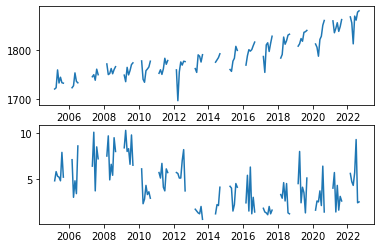

In [8]:
fig, axs = plt.subplots(2,1)

axs[0].plot(ts.time64, ts.data)
axs[1].plot(ts.time64, ts.error)

In [9]:
scores = dlmhelper.tools.cv_dlm_ensemble(ts, level = [True], variable_level=[False], trend = [True], variable_trend=[True]
                                           ,seasonal=[True], seasonal_period=[[12]], seasonal_harmonics=[[[1,2,3,4]]],
                                           variable_seasonal=[[[True, False]]], autoregressive=[None, 1], irregular=[True, False], verbose=0)

In [10]:
results = dlmhelper.tools.dlm_ensemble(ts,"TCCON_NYA", level = [True], variable_level=[False], trend = [True], variable_trend=[True]
                                           ,seasonal=[True], seasonal_period=[[12]], seasonal_harmonics=[[[1,2,3,4]]],
                                           variable_seasonal=[[[True, False]]], autoregressive=[None, 1], irregular=[True, False], scores = scores, verbose=2)

Processed: LTs_SsP12H1_I
Processed: LTs_SsP12H1
Processed: LTs_SsP12H1_A1_I
Processed: LTs_SsP12H1_A1
Processed: LTs_SP12H1_I
Processed: LTs_SP12H1
Processed: LTs_SP12H1_A1_I
Processed: LTs_SP12H1_A1
Processed: LTs_SsP12H2_I
Processed: LTs_SsP12H2
Processed: LTs_SsP12H2_A1_I
Processed: LTs_SsP12H2_A1
Processed: LTs_SP12H2_I
Processed: LTs_SP12H2
Processed: LTs_SP12H2_A1_I
Processed: LTs_SP12H2_A1
Processed: LTs_SsP12H3_I
Processed: LTs_SsP12H3
Processed: LTs_SsP12H3_A1_I
Processed: LTs_SsP12H3_A1
Processed: LTs_SP12H3_I
Processed: LTs_SP12H3
Processed: LTs_SP12H3_A1_I
Processed: LTs_SP12H3_A1
Processed: LTs_SsP12H4_I
Processed: LTs_SsP12H4
Processed: LTs_SsP12H4_A1_I
Processed: LTs_SsP12H4_A1
Processed: LTs_SP12H4_I
Processed: LTs_SP12H4
Processed: LTs_SP12H4_A1_I
Processed: LTs_SP12H4_A1


In [11]:
results.summary(sort="agg")

| Model            | converged   |      aic |       ll |             ssr |           mse |   cov_level |   cov_trend |     cov_seas |          cov_ar |    cv_amse |              agg |
|:-----------------|:------------|---------:|---------:|----------------:|--------------:|------------:|------------:|-------------:|----------------:|-----------:|-----------------:|
| LTs_SP12H1_I     | True        |  970.324 | -483.162 | 21570.4         | 181.264       |     10.597  |   0.0181183 |      7.11359 |     0           |    209.6   |    227.31        |
| LTs_SP12H1_A1_I  | True        |  974.324 | -483.162 | 21570.6         | 181.265       |     10.5965 |   0.0181127 |      7.11367 |     9.16897e-06 |    209.603 |    227.313       |
| LTs_SsP12H1_A1_I | True        |  975.313 | -482.657 | 20038.7         | 168.393       |     12.157  |   0.0200474 |     13.61    |     4.48728e-08 |    217.519 |    243.286       |
| LTs_SsP12H1_I    | True        |  971.313 | -482.657 | 20038.5         | 168.3

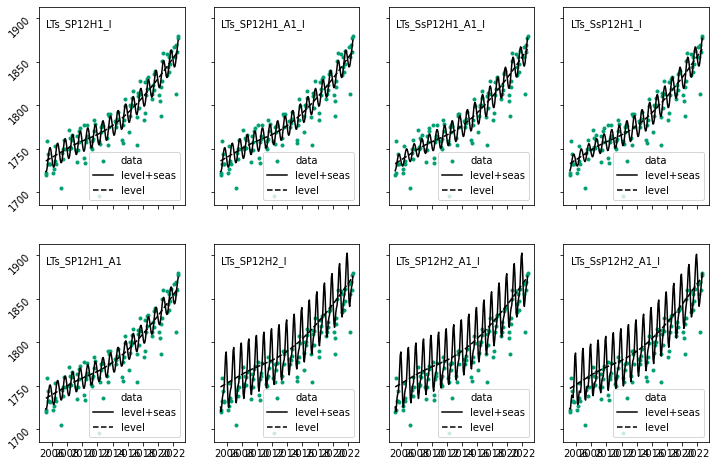

In [12]:
results.plot_summary(sort="agg", num=8, figsize=(12,8))

In [13]:
r=results.get_best_result(sort="agg")

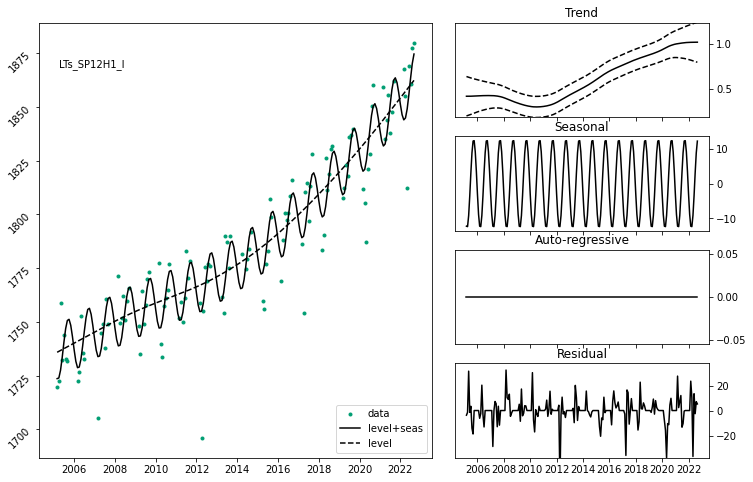

In [14]:
fig = r.plot_summary(figsize=(12,8))

# TCCON XCO2

In [18]:
time = ds.time.data
data = ds.xco2.data
error = ds.xco2_error.data
product_type ="TCCON.GGG2020"

ds.close()

In [19]:
ts = dlmhelper.data.TimeSeries(data, time64 = time, time_unit='month', error=error, product_type=product_type)

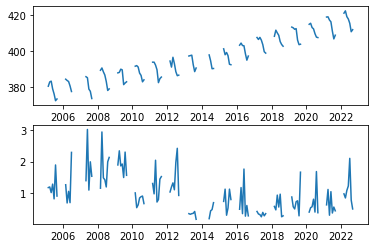

In [20]:
fig, axs = plt.subplots(2,1)

axs[0].plot(ts.time64, ts.data)
axs[1].plot(ts.time64, ts.error)

In [31]:
scores = dlmhelper.tools.cv_dlm_ensemble(ts, level = [True], variable_level=[False], trend = [True], variable_trend=[True]
                                           ,seasonal=[True], seasonal_period=[[12]], seasonal_harmonics=[[[1,2,3,4]]],
                                           variable_seasonal=[[[True, False]]], autoregressive=[None], irregular=[True, False], verbose=0)

In [32]:
results = dlmhelper.tools.dlm_ensemble(ts,"TCCON_NYA", level = [True], variable_level=[False], trend = [True], variable_trend=[True]
                                           ,seasonal=[True], seasonal_period=[[12]], seasonal_harmonics=[[[1,2,3,4]]],
                                           variable_seasonal=[[[True, False]]], autoregressive=[None], irregular=[True, False], scores = scores, verbose=2)

Processed: LTs_SsP12H1_I
Processed: LTs_SsP12H1
Processed: LTs_SP12H1_I
Processed: LTs_SP12H1
Processed: LTs_SsP12H2_I
Processed: LTs_SsP12H2
Processed: LTs_SP12H2_I
Processed: LTs_SP12H2
Processed: LTs_SsP12H3_I
Processed: LTs_SsP12H3
Processed: LTs_SP12H3_I
Processed: LTs_SP12H3
Processed: LTs_SsP12H4_I
Processed: LTs_SsP12H4
Processed: LTs_SP12H4_I
Processed: LTs_SP12H4


In [33]:
results.summary(sort="agg")

| Model         | converged   |     aic |       ll |           ssr |         mse |     cov_level |   cov_trend |       cov_seas |   cov_ar |   cv_amse |           agg |
|:--------------|:------------|--------:|---------:|--------------:|------------:|--------------:|------------:|---------------:|---------:|----------:|--------------:|
| LTs_SP12H1_I  | True        | 462.374 | -229.187 | 251.114       | 2.1102      |      0.1354   | 0.000321465 |      0.0835917 |        0 |   2.61291 |   2.8319      |
| LTs_SsP12H1_I | True        | 464.374 | -229.187 | 251.128       | 2.11032     |      0.13536  | 0.000321858 |      0.0835986 |        0 |   2.78431 |   3.00327     |
| LTs_SP12H2_I  | True        | 441.174 | -218.587 | 203.816       | 1.71274     |      0.627166 | 0.000326462 |      0.99369   |        0 |   2.1404  |   3.76125     |
| LTs_SsP12H2_I | True        | 443.174 | -218.587 | 203.816       | 1.71274     |      0.627138 | 0.000319433 |      0.993664  |        0 |   2.23247 |   

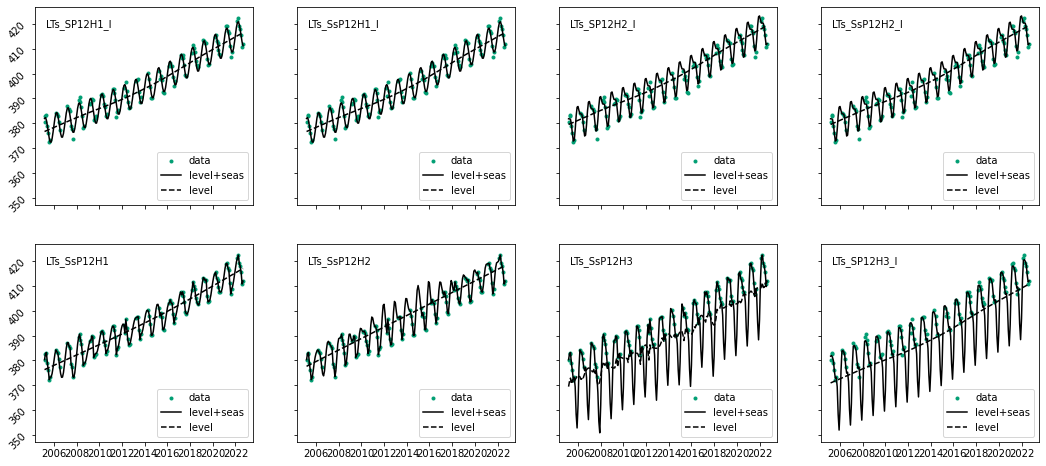

In [40]:
results.plot_summary(sort="agg", num=8, figsize=(18,8))

In [41]:
r=results.get_best_result(sort="agg")

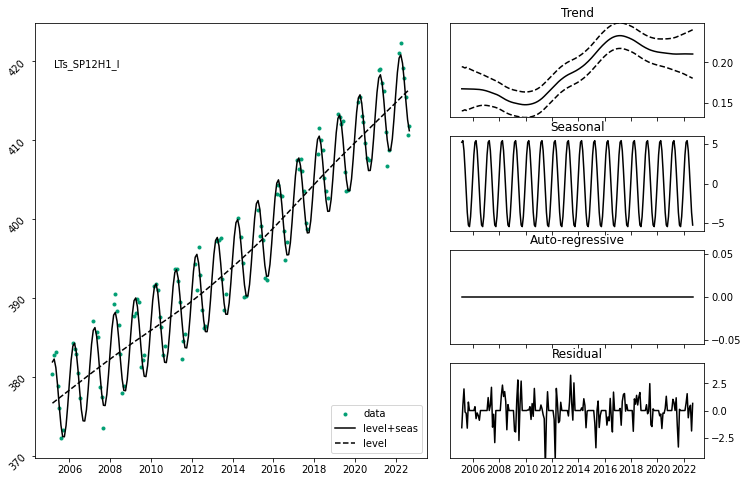

In [42]:
fig = r.plot_summary(figsize=(12,8))